# HDDM models results summary

Imports

In [1]:
import os
import numpy as np
import pandas as pd
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from factor_analyzer import FactorAnalyzer
from statsmodels.stats.multitest import multipletests

In [2]:
# read beh, num trials in analysis, questio and make a correlation with delta_ne, alpha_ne

## Read data

Read behavioral and questionnarie data

In [2]:
behavioral_data = pd.read_csv('../data/beh_sonata.csv')
questionnarie_data = pd.read_csv('../data/sonata_scales.csv').rename(columns={'Demo_kod': 'ID'})

data_df = pd.merge(behavioral_data, questionnarie_data, on='ID', how='inner') # You can use 'left', 'right', or 'outer' depending on your needs

In [3]:
columns = [
    'ID',
    'IUI-A General Unacceptability of Uncertainty',
    'IUI-B Avoidance',
    'IUI-B Doubting',
    'IUI-B Overestimation',
    'IUI-B Worrying',
    'IUI-B Control',
    'IUI-B Reassurance',
    'IUI-B Negative Manifestation of Uncertainty',
    # 'Intolerance of Uncertainty - Prospective Anxiety',
    # 'Intolerance of Uncertainty - Inhibitory Anxiety',
    # 'Thought Suppression Inventory',
    # 'Guilt sensitivity',
    # 'SP (Punishment Sensitivity)',
    # 'TCQ Distraction',
    # 'TCQ Social Control',
    'TCQ Worry',
    # 'TCQ Punishment',
    # 'TCQ Re-Appraisal',
    'KTM Positive beliefs',
    'KTM Negative beliefs',
    'KTM Cognitive confidence',
    'KTM Need for control',
    'KTM Self-consciousness',
    # 'Obsessional Beliefs - Importance/Control of Thoughts',
    # 'STAI Trait SUM',
    # 'DASS-21 Stress scale 0-SUM',
    # 'DASS-21 Depression scale 0-SUM',
    # 'BAS Dzialanie',
    # 'BAS Poszukiwanie przyjemnosci',
    # 'BAS Wrazliwosc na nagrode',
    # 'BIS',
    # 'Obsessive-Compulsive WASHING',
    # 'Obsessive-Compulsive OBSESSING',
    # 'Obsessive-Compulsive HOARDING',
    # 'Obsessive-Compulsive ORDERING',
    'Obsessive-Compulsive CHECKING',
    # 'Obsessive-Compulsive NEUTRALIZING',
    'Rumination Full Scale',
    'Nietolerancja wieloznaczności-FULL',
    'SR (Reward Sensitivity)',
    'number_error',
    'Płeć',
]

data_df = data_df[columns]
data_df['Płeć'] = data_df['Płeć'].replace('Osoba niebinarna', 0.5)

----

In [93]:
data_for_factor_df = data_df[columns]
# data_df['Płeć'] = data_df['Płeć'].replace('Osoba niebinarna', 0.5)

In [94]:
data_for_factor_df = data_for_factor_df.astype(float)

In [95]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(data_for_factor_df)
kmo_model

/home/anna/Work/jointError_cmd_test/venv/lib/python3.9/site-packages/factor_analyzer/utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


0.8713828414037254

In [96]:
fa = FactorAnalyzer(38, rotation='varimax')
fa.fit(data_for_factor_df)
# Check Eigenvalues
ev, v = fa.get_eigenvalues()
ev

array([1.00490459e+01, 3.04407766e+00, 2.29589209e+00, 2.04179739e+00,
       1.69349891e+00, 1.49912384e+00, 1.25362630e+00, 1.11738450e+00,
       1.07487073e+00, 1.00170742e+00, 9.18178851e-01, 8.70863343e-01,
       8.33835329e-01, 7.54254595e-01, 6.71726073e-01, 6.46563235e-01,
       6.23007655e-01, 6.12752556e-01, 5.49156307e-01, 5.03178317e-01,
       4.85135028e-01, 4.46027146e-01, 4.21150254e-01, 3.97761952e-01,
       3.81178923e-01, 3.65022409e-01, 3.39174421e-01, 3.22924571e-01,
       3.08300117e-01, 2.81280018e-01, 2.46479351e-01, 2.41813874e-01,
       2.24410711e-01, 1.87341819e-01, 1.63486617e-01, 1.33971792e-01,
       8.42335161e-16])

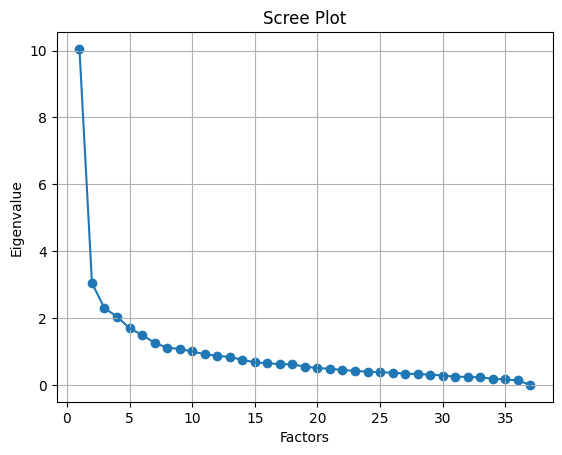

In [97]:
# Create scree plot using matplotlib
plt.scatter(range(1,data_for_factor_df.shape[1]+1),ev)
plt.plot(range(1,data_for_factor_df.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [99]:
# Number of factors to extract (adjust as needed)
n_factors = 10

# Initialize factor analyzer
fa = FactorAnalyzer(n_factors, rotation='promax')  # No rotation specified for now

# Fit the factor analyzer to your data
fa.fit(data_for_factor_df)

# Get the factor loadings
factor_loadings = fa.loadings_

# Get the communalities
communalities = fa.get_communalities()

# Get the eigenvalues
ev, v = fa.get_eigenvalues()

# Get the variance explained by each factor
variance_explained = fa.get_factor_variance()

variance_explained

(array([4.86810468, 4.86514572, 2.37769833, 1.78967081, 1.4646513 ,
        1.38139223, 1.17565359, 1.04207663, 0.91160201, 0.85302228]),
 array([0.1315704 , 0.13149042, 0.06426212, 0.04836948, 0.03958517,
        0.03733493, 0.03177442, 0.02816423, 0.02463789, 0.02305466]),
 array([0.1315704 , 0.26306082, 0.32732294, 0.37569242, 0.41527759,
        0.45261252, 0.48438694, 0.51255117, 0.53718906, 0.56024372]))

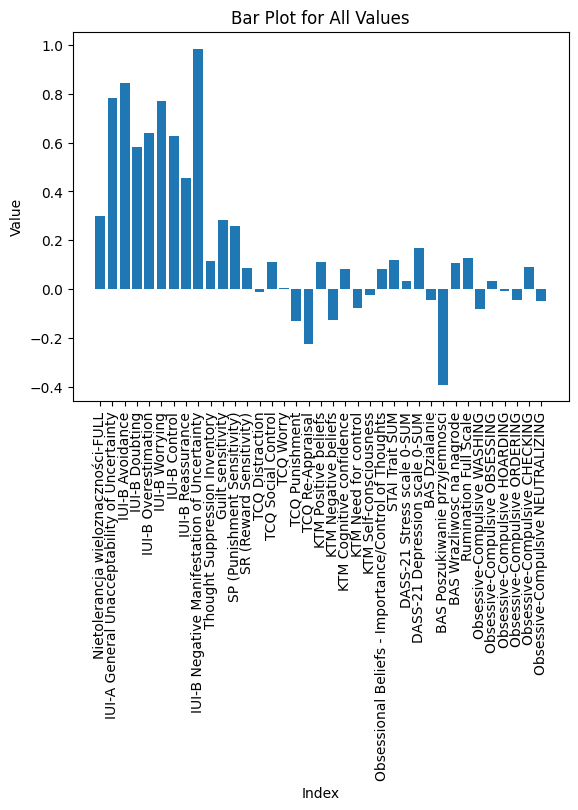

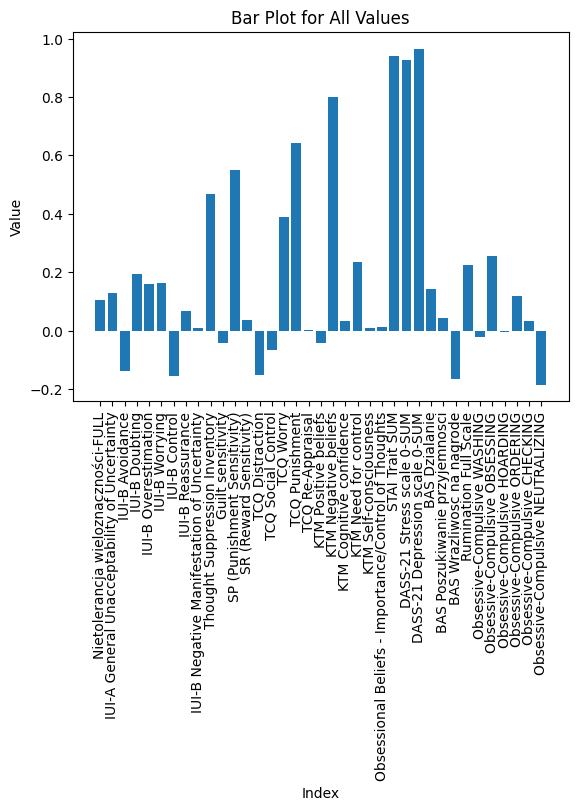

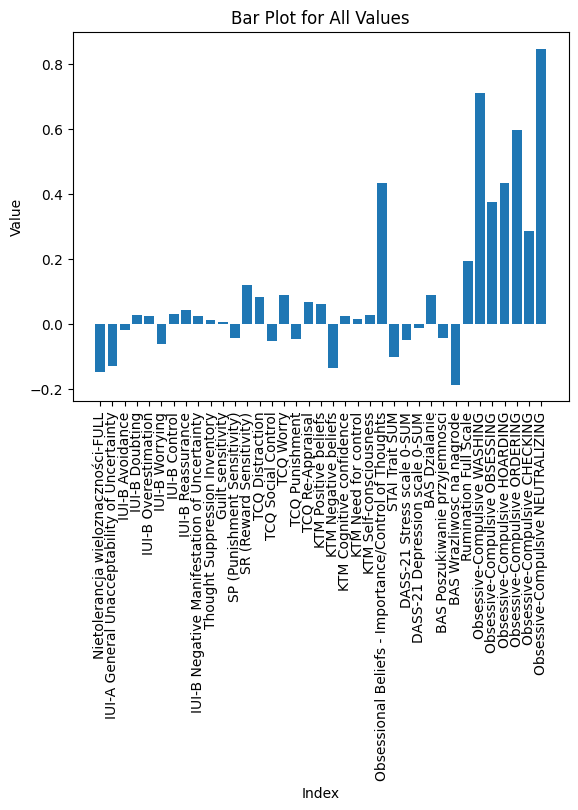

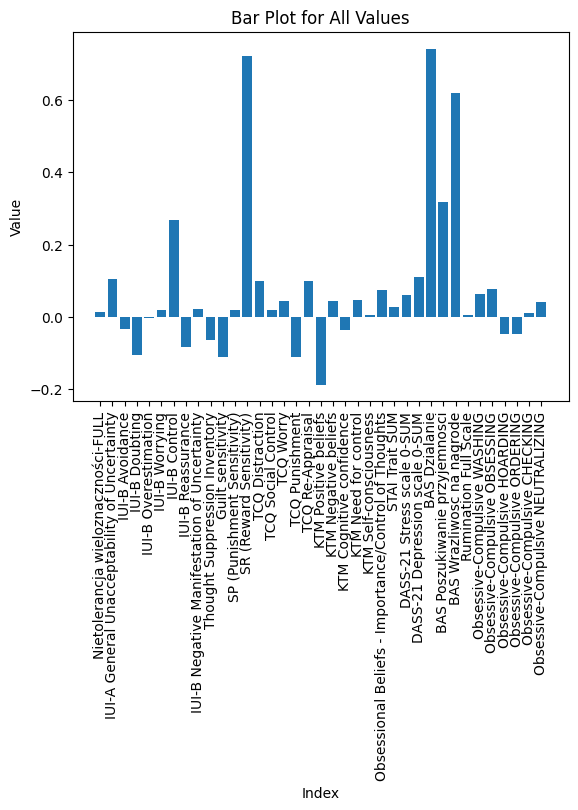

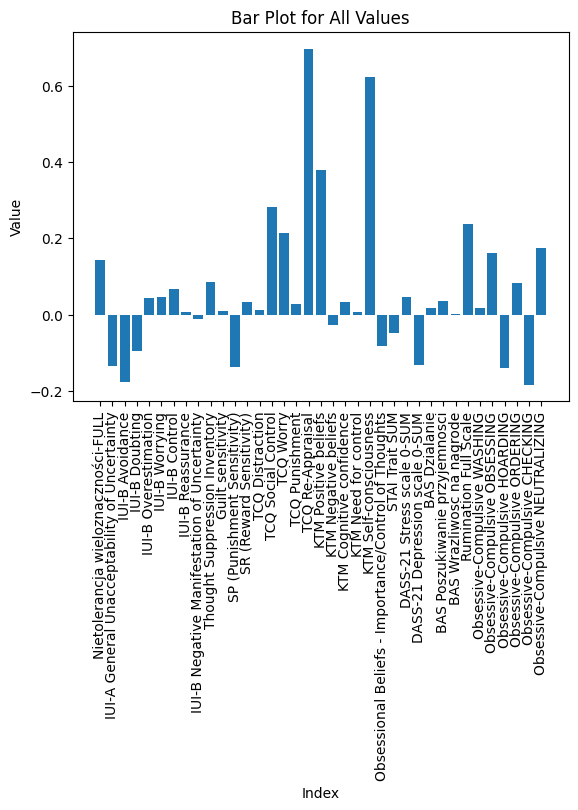

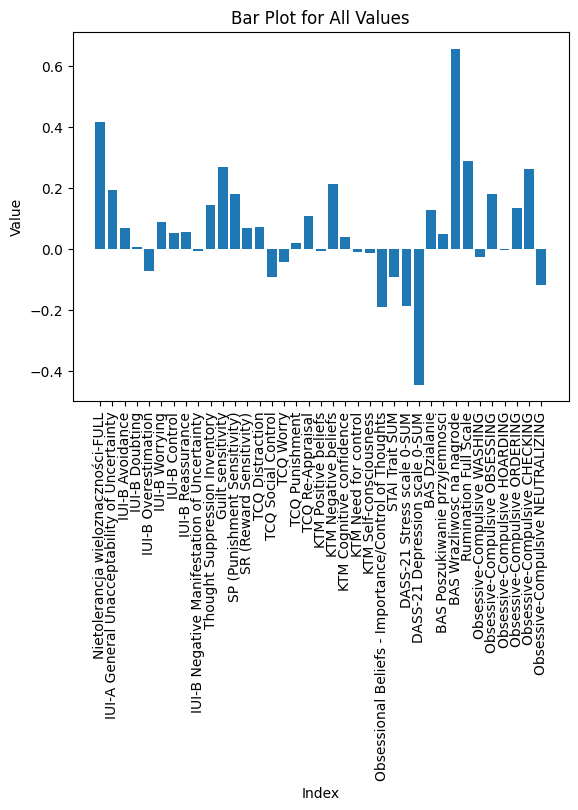

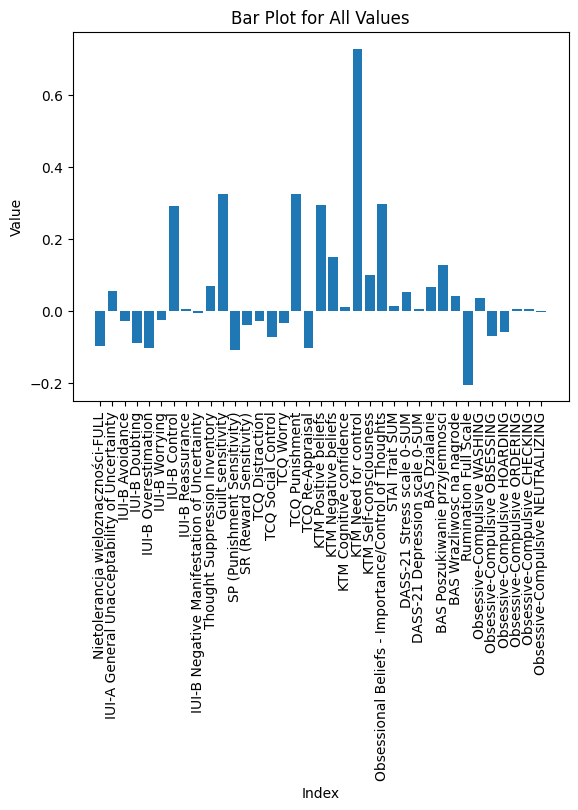

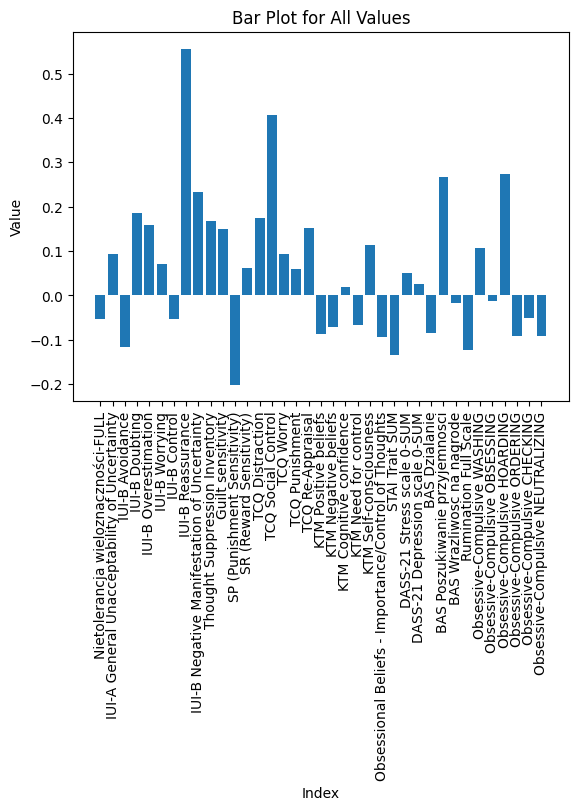

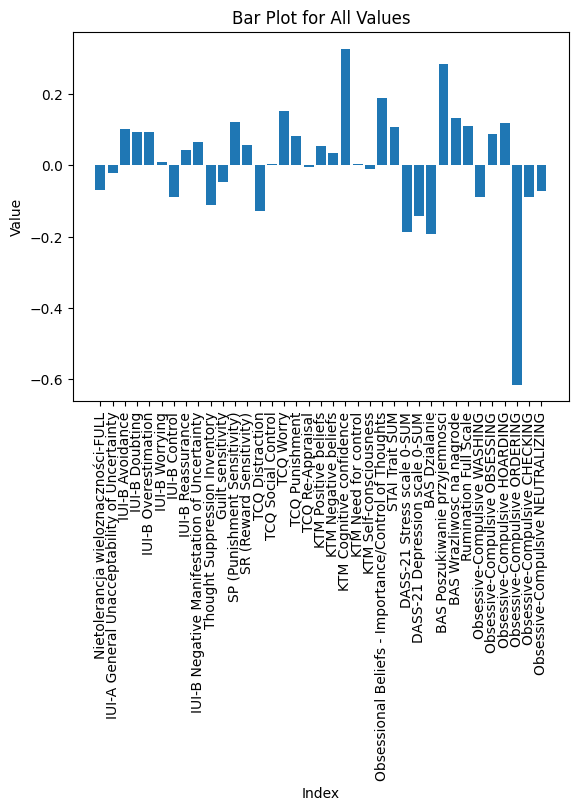

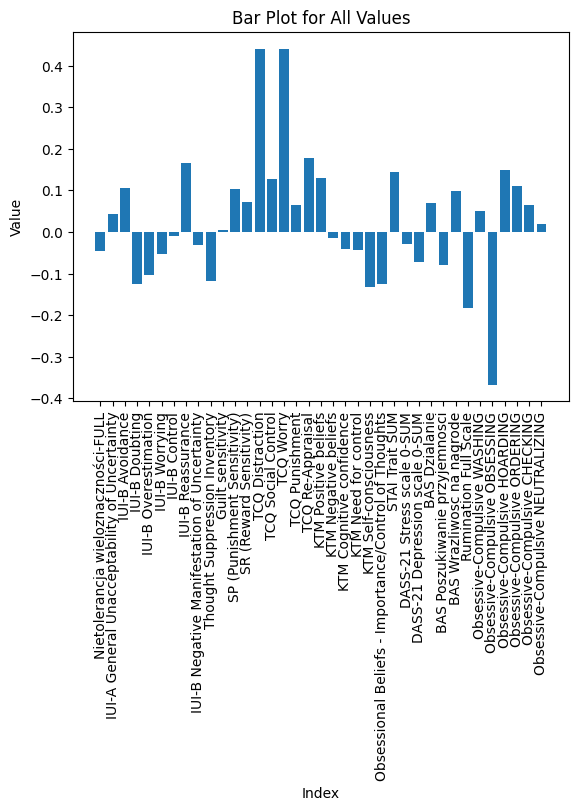

In [100]:
for index, factor in enumerate(factor_loadings.copy().T):
    plt.figure(index)
    plt.bar(x=np.arange(len(factor)), height=factor)
    plt.title('Bar Plot for All Values')
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.xticks(np.arange(len(factor)), columns, rotation=90)
    plt.show()

In [106]:
factors_data_df = pd.DataFrame(fa.transform(data_for_factor_df), columns=np.arange(0, n_factors))
factors_data_df

,0,1,2,3,4,5,6,7,8,9
0,-0.967371,0.793201,-0.696635,-0.060640,-0.005313,-0.221483,-1.149310,0.688381,0.529899,-0.322886
1,-0.924474,-0.160012,-0.377210,-1.008938,-0.870747,-0.400672,-1.511235,0.288067,0.349250,-0.706372
2,0.412188,-0.596030,-0.893446,-0.582817,-0.475328,-0.542789,-0.893040,-1.390098,0.540708,2.025527
3,0.039955,0.952914,-0.272714,-1.231208,-2.001420,0.475818,0.042946,1.203486,1.785403,-0.018874
4,0.298301,0.111969,-0.083483,0.230072,0.156614,1.496485,0.763862,0.334375,-0.787637,-0.341313
...,...,...,...,...,...,...,...,...,...,...
220,1.246250,1.429140,0.980101,-0.249863,0.017646,1.217201,-0.244777,0.923942,0.572402,-0.457493
221,-1.042208,-0.454180,-0.935750,-1.251912,-1.447843,-0.608258,-1.341073,-1.096815,-0.149516,-0.284542
222,0.556244,1.072006,0.287936,0.338409,0.396149,0.036724,0.474098,-0.448859,0.828476,0.372315
223,1.323326,1.647488,-0.451913,-0.887655,-0.278366,0.699823,-0.810783,-0.587568,0.965387,0.043304


In [108]:
columns2 = [
    'ID',
    'number_error',
    'Płeć',
]

data_id_df = data_df[columns2]
data_id_df['Płeć'] = data_id_df['Płeć'].replace('Osoba niebinarna', 0.5)

/tmp/ipykernel_36276/2114223477.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_id_df['Płeć'] = data_id_df['Płeć'].replace('Osoba niebinarna', 0.5)


In [113]:
data_df_factor = pd.concat([data_id_df, factors_data_df], axis=1)
data_df_factor

,ID,number_error,Płeć,0,1,2,3,4,5,6,7,8,9
0,32,77,0,-0.967371,0.793201,-0.696635,-0.060640,-0.005313,-0.221483,-1.149310,0.688381,0.529899,-0.322886
1,95,57,1,-0.924474,-0.160012,-0.377210,-1.008938,-0.870747,-0.400672,-1.511235,0.288067,0.349250,-0.706372
2,5,17,0,0.412188,-0.596030,-0.893446,-0.582817,-0.475328,-0.542789,-0.893040,-1.390098,0.540708,2.025527
3,67,28,0,0.039955,0.952914,-0.272714,-1.231208,-2.001420,0.475818,0.042946,1.203486,1.785403,-0.018874
4,4,51,0,0.298301,0.111969,-0.083483,0.230072,0.156614,1.496485,0.763862,0.334375,-0.787637,-0.341313
...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,132,22,0,1.246250,1.429140,0.980101,-0.249863,0.017646,1.217201,-0.244777,0.923942,0.572402,-0.457493
221,68,45,1,-1.042208,-0.454180,-0.935750,-1.251912,-1.447843,-0.608258,-1.341073,-1.096815,-0.149516,-0.284542
222,116,19,0,0.556244,1.072006,0.287936,0.338409,0.396149,0.036724,0.474098,-0.448859,0.828476,0.372315
223,13,27,0,1.323326,1.647488,-0.451913,-0.887655,-0.278366,0.699823,-0.810783,-0.587568,0.965387,0.043304


---

Read DDM data

In [4]:
d_df = pd.read_csv('../data/sonata_data_standarized.csv')
mapping_df = d_df.drop_duplicates(subset=['ID'])[['ID', 'participant_index']]

df_erp = pd.DataFrame()

df_erp[['ID', 'Peak_Ne']] = d_df[d_df['pre_acc'] == -1].groupby('ID')['pre_ne_FCz_standarized'].mean().reset_index()
df_erp[['ID', 'Peak_Nc']] = d_df[d_df['pre_acc'] == 1].groupby('ID')['pre_ne_FCz_standarized'].mean().reset_index()
df_erp[['ID', 'Mean_Ne']] = d_df[d_df['pre_acc'] == -1].groupby('ID')['pre_ne_mean_Fz'].mean().reset_index()
df_erp[['ID', 'Mean_Nc']] = d_df[d_df['pre_acc'] == 1].groupby('ID')['pre_ne_mean_Fz'].mean().reset_index()

In [5]:
path = '../plgrid_results/cond_models/sonata'
model = 'drift_boundary_pre_tbb'

file_path = f'{path}/{model}/results/{model}_summary_with_bf_plgrid_test.csv'
ddm_results_df = pd.read_csv(file_path).rename(columns={'Unnamed: 0': 'Variable'})

# remove not participants-related samples
df_cleaned = ddm_results_df[ddm_results_df['Variable'].str.contains('participant')]

# create index column
df_cleaned['participant_index'] = df_cleaned['Variable'].str.extract(r'\[(\d+)\]').astype('Int64')

# add ID info
df_merged = pd.merge(df_cleaned, mapping_df, on='participant_index', how='left').merge(df_erp, on='ID',  how='left')

# remove info on index from variable name
df_merged['Variable'] = df_merged['Variable'].str.replace(r'\[\d+\]', '', regex=True)

/tmp/ipykernel_40088/91340154.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['participant_index'] = df_cleaned['Variable'].str.extract(r'\[(\d+)\]').astype('Int64')


Merge dataframes

In [6]:
data_ddm_behavioral_df = pd.merge(df_merged, data_df, on='ID', how='left')

Create data for correlation

In [7]:
df_pivoted = data_ddm_behavioral_df.pivot_table(index=['participant_index', 'Mean_Ne', 'Mean_Nc', 'Peak_Ne', 'Peak_Nc'] + data_df.columns.to_list(), columns='Variable', values='Mean', aggfunc='mean').reset_index()

In [8]:
# Convert MultiIndex columns to simple index with modified column names
# df_pivoted.columns = ['{}_{}'.format(col[0], col[1]) for col in df_pivoted.columns]

In [9]:
final_data_df = df_pivoted.copy().drop(['ID', 'participant_index'], axis=1)
final_data_df = final_data_df.astype(float)

In [10]:
final_data_df

Variable,Mean_Ne,Mean_Nc,Peak_Ne,Peak_Nc,IUI-A General Unacceptability of Uncertainty,IUI-B Avoidance,IUI-B Doubting,IUI-B Overestimation,IUI-B Worrying,IUI-B Control,...,Płeć,participants_alpha,participants_alpha_cond,participants_alpha_ne,participants_alpha_ne_pre_acc,participants_delta,participants_delta_cond,participants_delta_ne,participants_delta_ne_pre_acc,participants_ter
0,-4.846868,1.761652,-0.896547,0.158610,57.0,24.0,21.0,20.0,24.0,14.0,...,1.0,1.442140,0.378713,-0.029577,0.034495,2.83789,2.26840,-0.089415,0.063710,0.102168
1,1.604769,-2.538743,0.148713,-0.033743,43.0,14.0,18.0,14.0,19.0,20.0,...,1.0,1.578960,0.500092,-0.019244,0.022476,6.22562,4.03478,-0.062684,0.108267,0.173031
2,-3.446056,-1.576174,-0.323790,0.128952,55.0,18.0,17.0,16.0,16.0,13.0,...,1.0,1.324730,0.293857,-0.032951,0.037565,3.67995,2.39617,-0.083952,0.068056,0.166094
3,2.718870,3.781654,-0.100440,0.022905,37.0,8.0,17.0,9.0,12.0,7.0,...,0.0,0.933187,0.206023,-0.022749,0.022374,2.34363,3.31583,-0.082030,0.074430,0.118610
4,-0.940806,3.348837,-1.024305,0.112711,64.0,11.0,12.0,14.0,19.0,13.0,...,0.0,1.785110,0.719240,-0.021189,0.053410,4.15084,3.24904,-0.067177,0.072958,0.109896
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,-22.606844,-4.971237,-1.647572,0.065113,38.0,14.0,20.0,14.0,14.0,15.0,...,0.0,1.368520,0.286551,-0.024987,0.042478,4.07311,2.06766,-0.068778,0.095748,0.151523
218,-9.309608,1.194268,-1.089271,0.180690,50.0,17.0,14.0,10.0,18.0,20.0,...,0.0,1.463580,0.446817,-0.030016,0.019280,2.51111,2.63229,-0.081214,0.083778,0.100377
219,-2.832054,1.404804,-0.717324,0.097323,61.0,21.0,18.0,20.0,24.0,15.0,...,1.0,1.411220,0.345559,-0.031430,0.039049,3.10386,1.87102,-0.073516,0.073409,0.101014
220,-4.022287,-3.689974,-0.255942,-0.049052,38.0,16.0,16.0,16.0,12.0,16.0,...,0.0,1.630170,0.515605,-0.049987,0.015200,3.57094,2.36324,-0.076900,0.079686,0.111951


## Create a correlation matrix

In [40]:
def r_pvalues(df, method='fdr_by'):
    cols = pd.DataFrame(columns=df.columns)
    p = pd.DataFrame(np.ones((df.shape[1], df.shape[1])), columns=df.columns, index=df.columns)
    for r in df.columns:
        for c in df.columns:
            tmp = df[df[r].notnull() & df[c].notnull()]
            p[r][c] = round(pearsonr(tmp[r], tmp[c])[1], 4)

    # Flatten the p-values matrix for correction
    p_values_flat = p.values[np.triu_indices_from(p, k=1)]
    
    # FDR Correction (Benjamini-Hochberg)
    _, p_fdr, _, _ = multipletests(p_values_flat, alpha=0.05, method=method)
    
    # Reshape the corrected p-values back into a matrix
    p_fdr_matrix = np.ones_like(p)
    
    p_fdr_matrix[np.triu_indices_from(p, k=1)] = p_fdr
    p_fdr_matrix = p_fdr_matrix.T
    p_fdr_matrix[np.triu_indices_from(p, k=1)] = p_fdr
    
    # Create DataFrames for corrected p-values
    p_fdr_df = pd.DataFrame(p_fdr_matrix, columns=df.columns, index=df.columns)
    return p, p_fdr_df

In [45]:
correlation_matrix = final_data_df.corr()
p_values, p_values_fdr_corrected = r_pvalues(final_data_df, method='fdr_bh')

significant_correlations = correlation_matrix[(p_values_fdr_corrected <= 0.05)]

/tmp/ipykernel_40088/1467152024.py:7: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  p[r][c] = round(pearsonr(tmp[r], tmp[c])[1], 4)


In [46]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None,):
    display(significant_correlations)

Variable,Mean_Ne,Mean_Nc,Peak_Ne,Peak_Nc,IUI-A General Unacceptability of Uncertainty,IUI-B Avoidance,IUI-B Doubting,IUI-B Overestimation,IUI-B Worrying,IUI-B Control,IUI-B Reassurance,IUI-B Negative Manifestation of Uncertainty,TCQ Worry,KTM Positive beliefs,KTM Negative beliefs,KTM Cognitive confidence,KTM Need for control,KTM Self-consciousness,Obsessive-Compulsive CHECKING,Rumination Full Scale,Nietolerancja wieloznaczności-FULL,SR (Reward Sensitivity),number_error,Płeć,participants_alpha,participants_alpha_cond,participants_alpha_ne,participants_alpha_ne_pre_acc,participants_delta,participants_delta_cond,participants_delta_ne,participants_delta_ne_pre_acc,participants_ter
Variable,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Mean_Ne,NaN,0.482720,0.696408,-0.481231,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.182858,NaN,-0.179158,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.231546,NaN,NaN,NaN,NaN
Mean_Nc,0.482720,NaN,NaN,0.176136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.165153,-0.224622,NaN,NaN,NaN,-0.190885,NaN,NaN,NaN,NaN
Peak_Ne,0.696408,NaN,NaN,-0.634604,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.170760,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.211368,NaN,NaN,-0.304606,-0.182472,NaN,NaN,NaN
Peak_Nc,-0.481231,0.176136,-0.634604,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.183310,-0.207524,NaN,NaN,NaN,NaN,0.305356,NaN,NaN,NaN
IUI-A General Unacceptability of Uncertainty,NaN,NaN,NaN,NaN,NaN,0.643681,0.571645,0.610341,0.805473,0.435902,0.543357,0.806104,0.246328,0.254151,0.384618,0.205718,0.196983,NaN,0.293535,0.396488,0.440867,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
IUI-B Avoidance,NaN,NaN,NaN,NaN,0.643681,NaN,0.533468,0.494857,0.624300,0.381192,0.348878,0.740523,0.184470,0.203022,0.228023,NaN,NaN,NaN,0.276274,0.294775,0.299576,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
IUI-B Doubting,NaN,NaN,NaN,NaN,0.571645,0.533468,NaN,0.632741,0.662884,0.225580,0.503938,0.798712,0.227176,NaN,0.448434,0.250675,NaN,NaN,0.202402,0.469495,0.353833,NaN,NaN,-0.174974,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
IUI-B Overestimation,NaN,NaN,NaN,NaN,0.610341,0.494857,0.632741,NaN,0.687426,0.288429,0.435006,0.803894,0.279864,0.201971,0.383040,0.184082,NaN,NaN,0.173334,0.430004,0.320618,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
IUI-B Worrying,NaN,NaN,NaN,NaN,0.805473,0.624300,0.662884,0.687426,NaN,0.405920,0.513761,0.876392,0.335134,0.304734,0.444243,0.212850,0.171088,0.191078,0.257847,0.484046,0.471334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
significant_correlations.to_csv('corrs_choice_corrected.csv')